# Week 4 - Divide and Conquer

**Goal:** Practice implementing and understanding three core algorithms.

**IMPORTANT:** FIRST, make a copy of this Colab so you don't lose your progress (This colab is view-only)

Instructions:
1. Implement the functions required. The skeleton is already provided for you.
2. Do not touch anything else outside of the `### YOUR CODE HERE ###` blocks. The rest of the notebook is used to test if your code is correct.
3. After each part, there will be some questions for you to answer. Reflect on your code and test them on some more examples if you like in order to figure out the answers.

Make sure to run each cell in succession.

*Prepared by Jan Christian Blaise Cruz and Alham Fikri Aji*

In [1]:
import random
import time
import math
import sys

import matplotlib.pyplot as plt

def check(name, got, expected):
    if got != expected:
        raise AssertionError(f"{name} failed.\nGot: {got}\nExpected: {expected}")
    print(f"{name} passed")

def is_sorted(li):
    return all(li[i] <= li[i+1] for i in range(len(li)-1))


## Part 1 — Binary Search

Binary search works only on a **sorted** list.

You will implement:
1) `binary_search_index(arr, target)` → index or -1  
2) `binary_search_first(arr, target)` → first index of target (duplicates) or -1


In [2]:
def binary_search_index(arr, target):
    ############### YOUR CODE HERE ###############
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1
    ##############################################


# Tests
check("binary_search_index basic",
      binary_search_index([1,3,5,7,9], 7),
      3)

check("binary_search_index missing",
      binary_search_index([1,3,5,7,9], 4),
      -1)

check("binary_search_index edges",
      (binary_search_index([2,4,6], 2), binary_search_index([2,4,6], 6)),
      (0, 2))


binary_search_index basic passed
binary_search_index missing passed
binary_search_index edges passed


In [3]:
def binary_search_first(arr, target):
    """
    Return the FIRST index of target in sorted list arr, or -1 if not found.
    """
    ############### YOUR CODE HERE ###############
    left = 0
    right = len(arr) - 1
    ans = -1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            ans = mid
            right = mid - 1  # hint: keep searching left side
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return ans
    ##############################################

# Tests
check("binary_search_first duplicates",
      binary_search_first([1,2,2,2,3,4], 2),
      1)

check("binary_search_first missing",
      binary_search_first([1,2,2,2,3,4], 5),
      -1)

check("binary_search_first single",
      binary_search_first([7], 7),
      0)


binary_search_first duplicates passed
binary_search_first missing passed
binary_search_first single passed


## Part 2 — Quicksort

You will implement:
1) `quicksort(li)` (recursive, returns new list)
2) A version with a better pivot (random pivot)
3) Compare behavior on sorted vs random input


In [4]:
def quicksort(li):
    ################## YOUR CODE HERE ##################
    n = len(li)
    
    # base case
    if n <= 1:
        return li

    # set your pivot
    idx = 0

    # divide
    left_list, right_list = [], []

    for i in range(n):
        if i == idx:
            continue
        
        num = li[i]
        
        if num <= li[idx]:
            left_list.append(num)
        elif num > li[idx]:
            right_list.append(num)

    # conquer
    return quicksort(left_list) + [li[idx]] + quicksort(right_list)

    ####################################################


# Tests
check("quicksort empty", quicksort([]), [])
check("quicksort single", quicksort([5]), [5])
check("quicksort basic", quicksort([3,1,2]), [1,2,3])
check("quicksort duplicates", quicksort([3,1,2,2,3]), [1,2,2,3,3])

# Quick sanity: sorted output
arr = [random.randint(0, 20) for _ in range(30)]
out = quicksort(arr)
check("quicksort is_sorted", is_sorted(out), True)


quicksort empty passed
quicksort single passed
quicksort basic passed
quicksort duplicates passed
quicksort is_sorted passed


### Reflection Questions
1. Can you see any case where quicksort (in the way that we implemented it) will not be any faster than bubble sort or insertion sort?
2. How can we prevent this from happening? (hint: something to do with the pivot)

Let's implement a better version.

In [5]:
import random

random.randint(0, 10)

1

In [6]:
import random

def quicksort2(li):
    ################## YOUR CODE HERE ##################
    n = len(li)
    
    # base case
    if n <= 1:
        return li

    # set your pivot
    idx = random.randint(0, n)

    # divide
    left_list, right_list = [], []

    for i in range(n):
        if i == idx:
            continue
        
        num = li[i]
        
        if num <= li[idx]:
            left_list.append(num)
        elif num > li[idx]:
            right_list.append(num)

    # conquer
    return quicksort(left_list) + [li[idx]] + quicksort(right_list)
    ####################################################


# Tests (same results as Python's sorted)
for _ in range(10):
    arr = [random.randint(0, 50) for _ in range(40)]
    check("quicksort2 vs sorted", quicksort2(arr), sorted(arr))


quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed
quicksort2 vs sorted passed


## Part 3 — Mergesort

You will implement:
1) `merge(left, right)` for two sorted lists  
2) `mergesort(li)` using divide + merge


In [7]:
def merge(left, right):
    """
    Merge two sorted lists into one sorted list.
    """
    ################## YOUR CODE HERE ##################
    result = []
    
    left_idx, right_idx = 0, 0

    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1

    if left_idx < len(left):
        result.extend(left[left_idx:])

    if right_idx < len(right):
        result.extend(right[right_idx:])

    return result
    ####################################################

# Tests
check("merge basic", merge([1,3,5], [2,4,6]), [1,2,3,4,5,6])
check("merge empty left", merge([], [1,2]), [1,2])
check("merge empty right", merge([1,2], []), [1,2])
check("merge duplicates", merge([1,2,2], [2,3]), [1,2,2,2,3])


merge basic passed
merge empty left passed
merge empty right passed
merge duplicates passed


Now we'll turn this into mergesort.

In [8]:
def mergesort(li):
    ################## YOUR CODE HERE ##################
    n = len(li)
    
    # base case
    if n <= 1:
        return li

    # divide
    mid_idx = n // 2
    
    left_list = mergesort(li[:mid_idx])
    right_list = mergesort(li[mid_idx:])

    # conquer
    return merge(left_list, right_list)
    ####################################################

# Tests
check("mergesort empty", mergesort([]), [])
check("mergesort single", mergesort([5]), [5])
check("mergesort basic", mergesort([3,1,2]), [1,2,3])
check("mergesort duplicates", mergesort([3,1,2,2,3]), [1,2,2,3,3])

for _ in range(10):
    arr = [random.randint(0, 50) for _ in range(40)]
    check("mergesort vs sorted", mergesort(arr), sorted(arr))


mergesort empty passed
mergesort single passed
mergesort basic passed
mergesort duplicates passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed
mergesort vs sorted passed


## Part 4 — Compare Quicksort vs Mergesort (Timing)

Run the following cell and study the graphs.


=== n=200 ===
  case=random
    quicksort              0.000107s
    quicksort2             0.000094s
    mergesort              0.000146s
  case=sorted
    quicksort              0.001112s
    quicksort2             0.000559s
    mergesort              0.000096s
  case=reverse
    quicksort              0.000828s
    quicksort2             0.000518s
    mergesort              0.000118s

=== n=400 ===
  case=random
    quicksort              0.000219s
    quicksort2             0.000213s
    mergesort              0.000300s
  case=sorted
    quicksort              0.004122s
    quicksort2             0.002102s
    mergesort              0.000205s
  case=reverse
    quicksort              0.003271s
    quicksort2             0.001979s
    mergesort              0.000214s

=== n=800 ===
  case=random
    quicksort              0.000486s
    quicksort2             0.000485s
    mergesort              0.000650s
  case=sorted
    quicksort              0.016972s
    quicksort2             

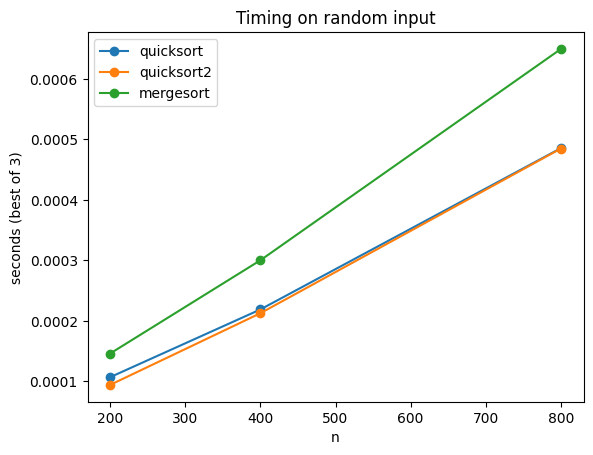

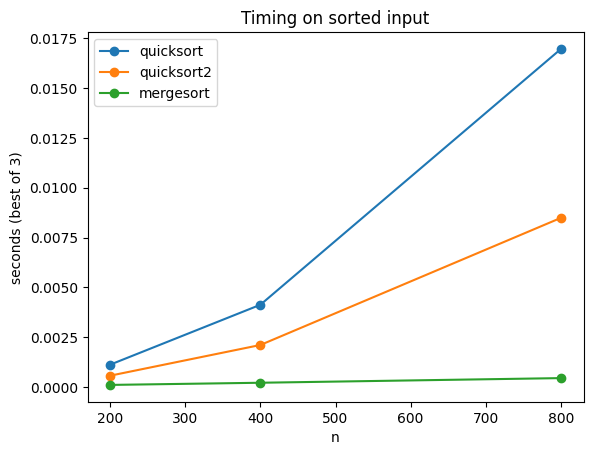

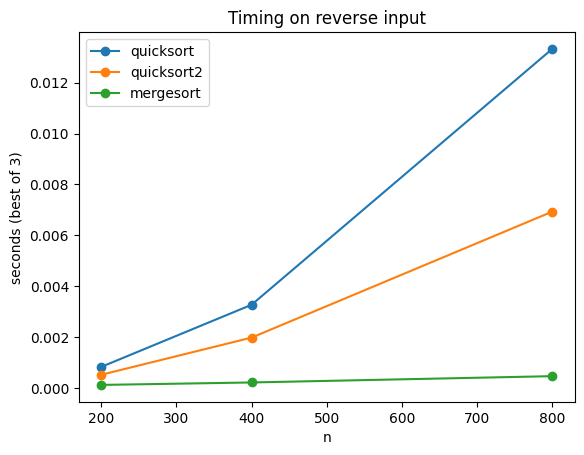

In [9]:
def time_func(func, arr, repeats=3):
    best = float("inf")
    for _ in range(repeats):
        data = arr.copy()
        t0 = time.perf_counter()
        out = func(data)
        t1 = time.perf_counter()
        # sanity check
        if out != sorted(arr):
            raise AssertionError(f"{func.__name__} returned wrong result")
        best = min(best, t1 - t0)
    return best

def make_cases(n, seed=0):
    random.seed(seed)
    rand = [random.randint(0, n) for _ in range(n)]
    sorted_case = list(range(n))
    reverse_case = list(range(n, 0, -1))
    return {"random": rand, "sorted": sorted_case, "reverse": reverse_case}

sizes = [200, 400, 800]  # keep moderate to avoid recursion issues with worst-case quicksort
funcs = [quicksort, quicksort2, mergesort]
cases = ["random", "sorted", "reverse"]

results = {f.__name__: {c: [] for c in cases} for f in funcs}

for n in sizes:
    data_cases = make_cases(n, seed=42)
    print(f"\n=== n={n} ===")
    for c in cases:
        arr = data_cases[c]
        print(f"  case={c}")
        for f in funcs:
            # Baseline quicksort can hit recursion limit on sorted/reverse at larger n
            try:
                t = time_func(f, arr, repeats=3)
                results[f.__name__][c].append(t)
                print(f"    {f.__name__:22s} {t:.6f}s")
            except RecursionError:
                results[f.__name__][c].append(None)
                print(f"    {f.__name__:22s} RecursionError")

for case in ["random", "sorted", "reverse"]:
    plt.figure()
    for f in funcs:
        ys = results[f.__name__][case]
        xs = [sizes[i] for i in range(len(sizes)) if ys[i] is not None]
        ys2 = [y for y in ys if y is not None]
        if xs:
            plt.plot(xs, ys2, marker="o", label=f.__name__)
    plt.xlabel("n")
    plt.ylabel("seconds (best of 3)")
    plt.title(f"Timing on {case} input")
    plt.legend()
    plt.show()


### Reflection Questions (short answers)

1) Which algorithm was fastest on random input? Why might that be?
   - `mergesort`
3) Why did `quicksort` (first pivot) struggle on sorted/reverse inputs?
   - it has a higher chance of getting empty left side
5) Mergesort is always **O(n log n)**. What tradeoff does it have vs quicksort?
   

## Extra Challenge

Two parallel server racks have matching ports numbered 1 to N from top to bottom. Cables connect the ports on the left rack to the ports on the right rack in a scrambled, one-to-one arrangement (e.g., left port 1 connects to right port 4). Calculate the total number of points where two cables cross over each other in the space between the racks.

**Input Format:** The input is a list of N integers representing the Right Rack connections.
Assume the Left Rack ports are always ordered 1 through N.
The i-th integer in your list tells you which port on the Right Rack the i-th Left port connects to.

**Example:**

Example Input: `[3, 1, 4, 2]`

Number of crossing: `3`

Explanation of the connection:

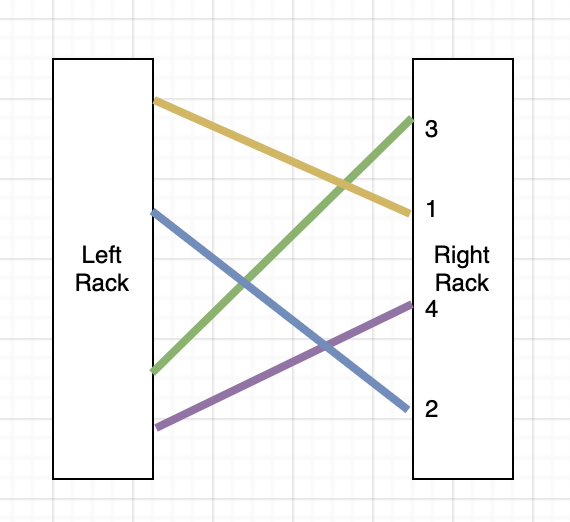

In [10]:
def solve(li):
    """
    Returns number of crossover (inversions)
    """
    ################## YOUR CODE HERE ##################
    n = len(li)
    order_list = [None] * n
    
    for i in range(n):
        order_list[li[i]-1] = i+1
    
    num_intersections = 0
    
    for i in range(1, n):
        num = li[i]
        lst = li[:i]
        num_intersections += sum([num<anum for anum in lst])
    
    return num_intersections
    ####################################################


# --- Tests ---
def check(name, actual, expected):
    status = "PASS" if actual == expected else f"FAIL (Got {actual}, expected {expected})"
    print(f"{name}: {status}")

arr = [3, 1, 4, 2]
answer = solve(arr)
check("Standard case", answer, 3)

arr = [2, 3, 4, 5, 1]
answer = solve(arr)
check("Standard case", answer, 4)


arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
answer = solve(arr)
check("Already sorted", answer, 0)

arr = list(range(10000, 0, -1))
answer = solve(arr)
check("Descending (Worst Case)", answer, 49995000)

Standard case: PASS
Standard case: PASS
Already sorted: PASS
Descending (Worst Case): PASS
